<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

# Lab 7: Analytical and Numerical Differentiation
In this lab, we find and use derivatives both analytically and numerically to understand how functions change and to locate their minima and maxima. We then compare between analytical and numerical derivatives, explore how each step size affects accuracy, and apply numerical gradients to optimize a Gaussian model more efficiently than grid search.
</span>

<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

# Questions
After we run all our experiments, we now answer the following questions below.

## Question 1
For experiment 1, how did your approximated derivatives (numerical derivatives) compare to the analytical solution? Describe what effect the h term had on the accuracy of the approximation. Discuss considerations / tradeoffs when picking a h value.

### Answer 1
In Experiment 1, the numerical derivatives were close to the analytical derivative when the step size h was small. As h got larger, the numerical curve drifted further away from the true derivative. As a result, the error increased as h did. 

The h term controls how the derivative is approximated. 
- Using a small h leads to better accuracy because it matches the actual slope of the function
- Using a large h leads to worse accuracy because the estimate uses points further away, so the "slope" becomes less representative of the real curve

When it comes the the tradeoffs for choosing h, there needs to be a balance because:
- If h is too large, the apprxoimation is coarse and inaccurate
- If h is too small, rounding errors from the computer start to dominate
Do a optimal h is a balance, where h is small snough to reduce truncation error and not so big that rounding error becomes a problem


## Question 2
In experiment 2 you should have found both local extrema of the function. Describe what information the derivative provides and how you found these extrema. If each numerical approximation of the derivative didn’t always lead to both extrema of the function, explain why.

### Answer 2
The derivative tells us about the rate of change of a function. When the derivative is zero, the slope of the function is flat.  Points where the derivative is zero are the local maxima, local minima or global maxima, global minima as well as inflection points.

The extrema was found in two different ways. The first way was using equating the derivative of the linea equation to zero and finding the values of x and then the values of y. For numerical approximations, we found the smallest two values and then find their respective x and y values. 

Numerical derivatives might not capture the extrema because:
- The h value may be too large, which results in "smoothing over" details in the function
- A low resolution in sampling where the grid of x-values is corase, the real zero of the derivative might lie between two sampled points
- Extremely small h can result in rounding errors

## Question 3
Be creative - brainstorm a way that you could leverage the information of the derivative to only find the minima, not all extrema.

### Answer 3
1. A minimum only happens when the derivative is negative before the point (function goes down) and positive after it (function goes up). Going through derivative values, we would have to pick between there. 
2. Another method would be to use the second derivative test on points where the first derivative is zero. When the second derivative is grater than 0, this means the point is a minimum. 
3. Only look for points in the convex regions where minima can exist but the maxima can't. We can the compute the second derivative numerically across that domain and search for zeros of the first derivative within that interval

## Question 4
For experiment 3, you performed another grid search. Compare and contrast what features you were looking for in the error-space grid search (lab 06) and the derivative-space grid search. Make sure to compare the computational complexity between these spaces. Depending on your answer do you think it makes more sense to perform a grid search in error space or derivative space?

### Answer 4
For lab 6, we created a cost function for a linear model and performed a 4 dimensional grid search. For each combination of parameters, we put it in the cost function and measured how big the error was. We then kept track of the parameters that gave the smallest error. Laslty, we picked the parameters with the smallest error. The computational complexity is O(k^4 * N) where we each k is a weight and N is number of data points.

For lab 7, we wanted to find good estimates of the gaussian parameters of mu and sigma. We then set up a grid of mu and sigma values of a specified range and steps to create combinations of parameter pairs. Using these pairs, we computed the gradient of the cost. We stored the partial derivative in a 2D grid. We were looking for places where the partial derivatives were going to 0, because zero derivatives means we found a stationary point. The computational complexity is O(k^2 * N) where k is a partial derivative and N is the number of data points. 

Based on the run-time complexities, it makes more space to perform a grid search in the derivative space because it is much faster.

## Question 5
Be even more creative – brainstorm a way (or algorithm) that you could use to leverage the gradient, without having to use a grid search method.

### Answer 5
We can avoid the need to use a grid search method by using gradient descent. It works as follows:
- We start with a initial guess for the parameters and compute the gradient at that point
- We then take a steep downhill, which is the opposite direction of the gradient
- We keep repeating this process until the gradient becomes close to zero

This is a much better approach because the gradient points towards the minimum, so we only check the points that matter. 



<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Experiment 1: Analytical vs Numerical Differentiation
In this experiment, we compare the analytical derivative of a cubic function to its numerical approximation using different step sizes h. We plot both the function and its derivatives, observe how changing h affects the accuracy of the numerical derivative compared to the analytical one.

</span>

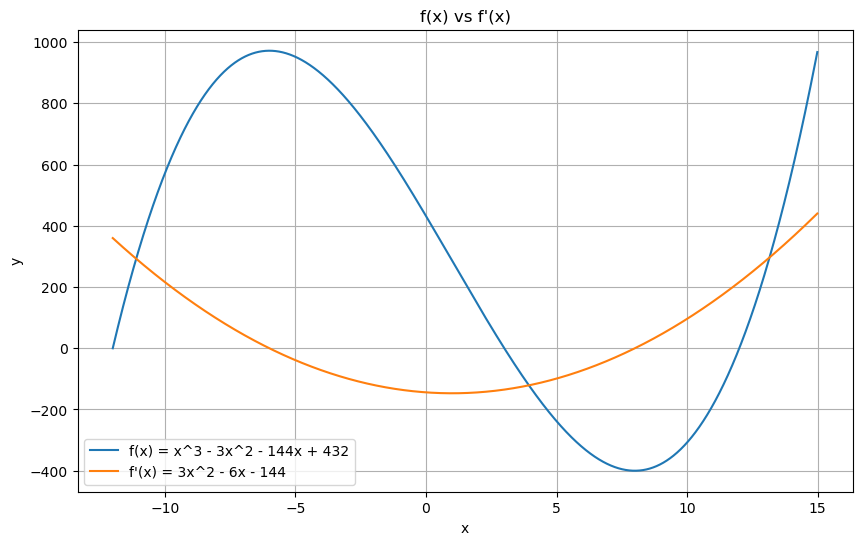

In [ ]:

""" 
    - f(x) = x^3 - 3x^2 - 144x + 432
    -  f'(x) = 3x^2 - 6x - 144

    - plot the function f(x) with bounds -12 <= x <= 15 with a step size of 0.01
        - graph f'(x) with bounds -12 <= x <= 15
"""

# importing libraries
import numpy as np
import matplotlib.pyplot as plt

# function and derivative of function
x = np.arange(-12, 15, 0.01)
f_x = x**3 -3*x**2 - 144*x + 432
f_prime_x = 3*x**2 - 6*x - 144

# plotting code
plt.figure(figsize=(10, 6))
plt.plot(x, f_x, label="f(x) = x^3 - 3x^2 - 144x + 432")
plt.plot(x, f_prime_x, label="f'(x) = 3x^2 - 6x - 144")
plt.xlabel("x")
plt.ylabel("y")
plt.title("f(x) vs f'(x)")
plt.legend()
plt.grid(True)
plt.show()



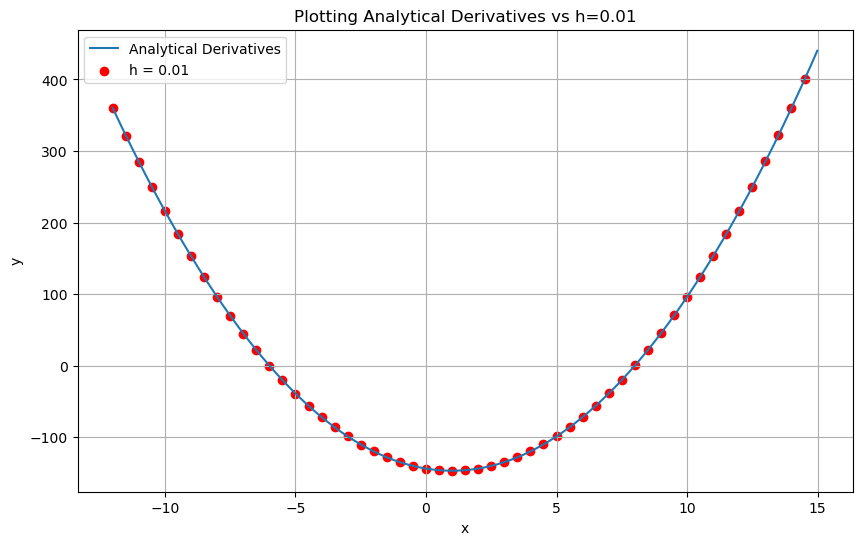

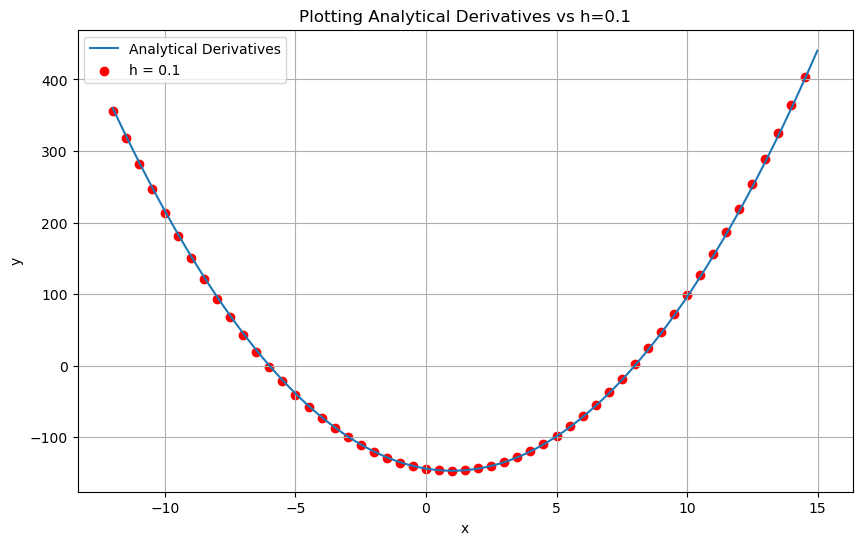

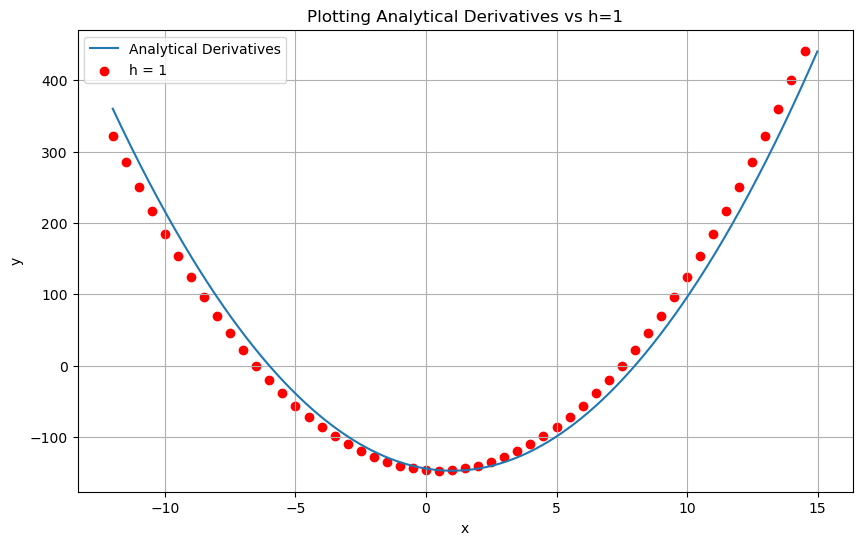

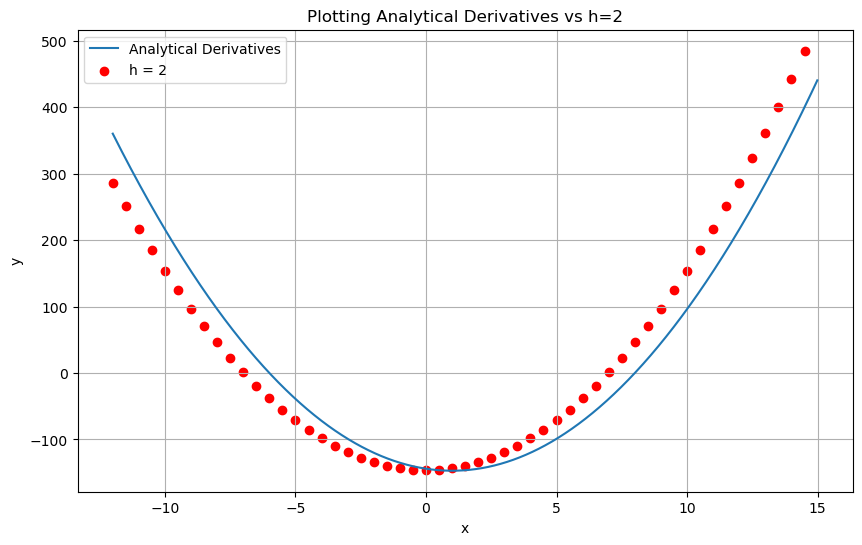

In [ ]:

""" 
    - make a plot for each of the h values listed below.
        - for each plot, graph a line plot of analytical derivative solved in 2
    
    - in each figure, overlay the numerical approximation of the derivative using a scatterplot
"""

def f(x):
    return x**3 -3*x**2 - 144*x + 432

def f_prime(x):
    return 3*x**2 - 6*x - 144

h_list = [0.01, 0.1, 1, 2]
x = np.arange(-12, 15, 0.01)
numerical_derivative_list = []

for h in h_list:

    # compute the numerical derivative
    numerical_derivative = (f(x+h) - f(x)) / h
    numerical_derivative_list.append(numerical_derivative)

    # plotting code
    plt.figure(figsize=(10, 6))
    plt.plot(x, f_prime(x), label="Analytical Derivatives")
    plt.scatter(x[::50], numerical_derivative[::50], color="red", label=f"h = {h}")
    plt.title(f"Plotting Analytical Derivatives vs h={h}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()



<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Experiment 2: 1-Dimensional Grid Search (Derivative Space)
In this experiment, we use both analytical and numerical derivatives to find where the derivative equals zero, which is the points where the original function has maxima or minima. We solve for those x-values, plot the original function and mark those points to vasualize where the fucntion's slope becomes zero.
</span>

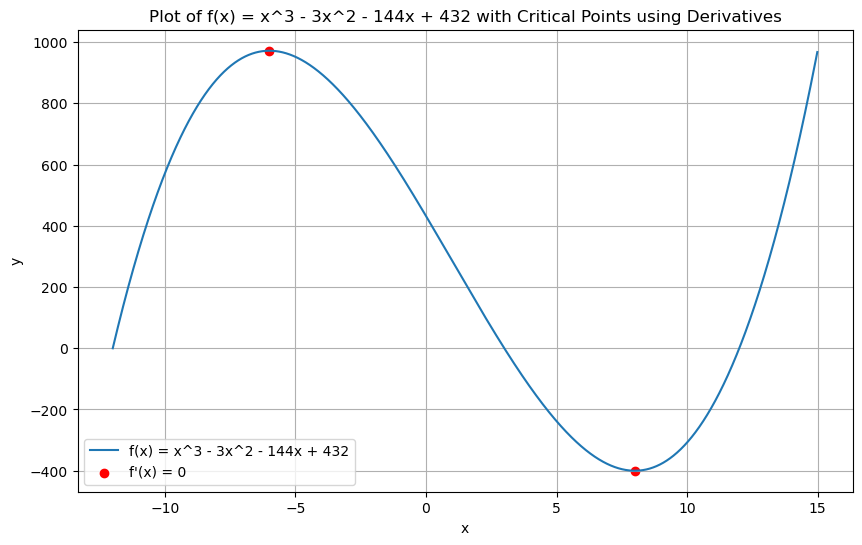

In [25]:

"""
    - solve by hand for values of x where derivative is equal to 0

        f(x) = x^3 - 3x^2 - 144x + 432
        f'(x) = 3x^2 - 6x - 144

        f'(x) = 0 so 3x^2 - 6x - 144 = 0
        divide by 3 entirely -> x^2 - 2x - 48 = 0
        since x^2 - 2x - 48 = 0 -> x = (x + 6) (x - 8) = 0
        as a result -> x = -6 and x = 8
    
    - using x values, create a new figure with a line plot and plot of critical points
"""

def f(x):
    return x**3 -3*x**2 - 144*x + 432

x = np.arange(-12, 15, 0.01)
y = f(x)

# finding the critical points
critical_x = np.array([-6, 8])
critical_y = f(critical_x)

# plotting code
plt.figure(figsize=(10, 6))
plt.plot(x, y, label= "f(x) = x^3 - 3x^2 - 144x + 432")
plt.scatter(critical_x, critical_y, color="red", label="f'(x) = 0")
plt.title("Plot of f(x) = x^3 - 3x^2 - 144x + 432 with Critical Points using Derivatives")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()




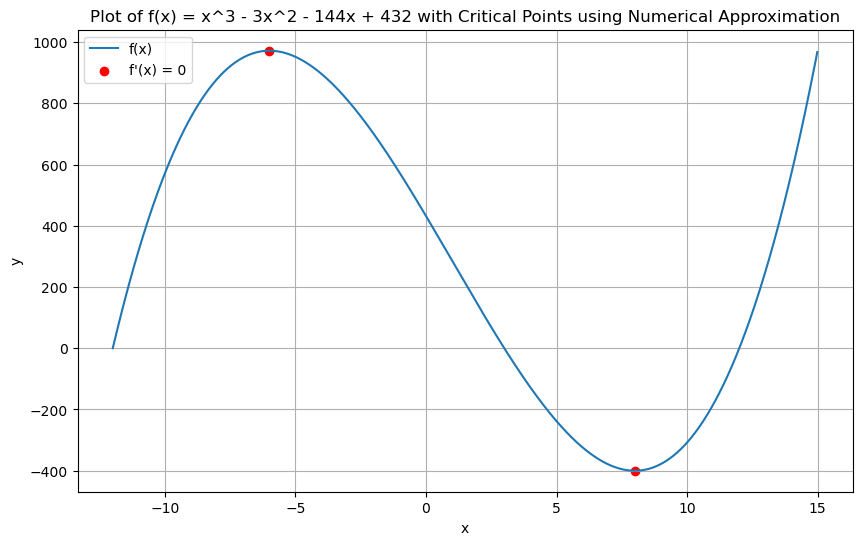

In [26]:

""" 
    - copy the vectors used to store the derivative's numerical approximations

    - search through each of numerically approximated derivative vectors to find 
        the 2 locations (x-values) that are closest to f'(x) = 0

    - with these found x values, plot the original function using a line plot and 
        and place a dot over each of the found x values
"""

def f(x):
    return x**3 - 3*x**2 - 144*x + 432

h = 1e-5
x = np.arange(-12, 15, 0.01)
numerical_derivative = (f(x+h) - f(x)) / h

# find the absolute value
abs_value = np.abs(numerical_derivative)

# find the smallest two values
closest_indices = np.argsort(abs_value)[:2]

# get the x-values and y-values
x_values = x[closest_indices]
y_values = f(x_values)

# plotting code
plt.figure(figsize=(10, 6))
plt.plot(x,f(x), label="f(x)")
plt.scatter(x_values, y_values, color="red", label="f'(x) = 0")
plt.title("Plot of f(x) = x^3 - 3x^2 - 144x + 432 with Critical Points using Numerical Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


<span style="font-family: 'JetBrains Mono', monospace; font-size:16px;">

## Experiment 3: Gaussian Model Grid Search - Derivative Space
We now numerically compute the 2D gradient of the Gaussian model's cost using a small step h = 1e-5, then grid search over the mean = [5, 6] and standard deviation = [1, 1.75] to find where both gradient components are near zero. Finally, visualize the two derivative grids as heatmaps, locate the zero points and plug those parameters into `cost_function.predict()` to plot the model against the data.
</span>

In [ ]:

""" 

    - import the cost function class and load in data from the gaussdist.csv file
    - write a gradient class and implement a gradient solver and then import it here
    - grid search on model parameters
    
"""

import pandas as pd
import sys
sys.path.append('./code')
from cost_functions import GaussianCostFunction
from Numerical_Differentiation import NumericalDifferentiation

# import the data frame
gaussian_df = pd.read_csv("C:/GitHub/Semester 5/TheoryOfMachineLearning/10_week_ten/lab/data/gaussdist.csv", header=None, names=["x", "y"])

# range of mu and sigma values
mu_values = np.linspace(5, 6, 100)
sigma_values = np.linspace(1, 1.75, 100)

# numerical differentiation & gaussian cost function
nd = NumericalDifferentiation(delta=1e-5)
gaussian_cost_func = GaussianCostFunction(
    features=gaussian_df['x'].values.reshape(-1, 1),
    y_true=gaussian_df['y'].values
)

# 2d array for gradients
mu_grid = np.zeros((len(mu_values), len(sigma_values)))
sigma_grid = np.zeros((len(mu_values), len(sigma_values)))

# grid search
for i, mu in enumerate(mu_values):
    for j, sigma in enumerate(sigma_values):

        params = np.array([mu, sigma])
        grad = nd.gradient(gaussian_cost_func, params)

        mu_grid[i,j] = grad[0]
        sigma_grid[i,j] = grad[1]



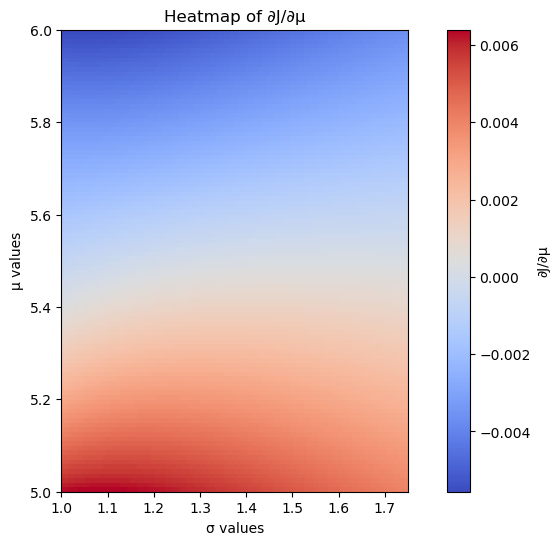

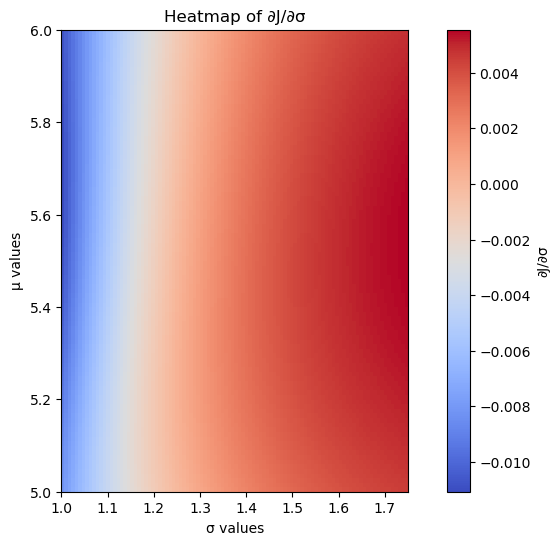

In [40]:

""" 

    - generate a heatmap for each of the two derivatives



"""

# heatmap of ∂J/∂μ
plt.figure(figsize=(10, 6))
plt.imshow(mu_grid, extent=[sigma_values.min(), sigma_values.max(), mu_values.min(), mu_values.max()], cmap='coolwarm')
plt.colorbar(label="∂J/∂μ")
plt.xlabel("σ values")
plt.ylabel("μ values")
plt.title("Heatmap of ∂J/∂μ")
plt.show()

# heatmap of ∂J/∂σ
plt.figure(figsize=(10, 6))
plt.imshow(sigma_grid, extent=[sigma_values.min(), sigma_values.max(), mu_values.min(), mu_values.max()], cmap='coolwarm')
plt.colorbar(label="∂J/∂σ")
plt.xlabel("σ values")
plt.ylabel("μ values")
plt.title("Heatmap of ∂J/∂σ")
plt.show()



In [ ]:

""" 
    - find locations in the derivative arrays that equal zero

"""

# index of smallest absolute value for mu
idx_mu = np.abs(mu_grid).argmin()
i_mu, j_mu = np.unravel_index(idx_mu, mu_grid.shape)

# index of smallest absolute value for sigma
idx_sigma = np.abs(sigma_grid).argmin()
i_sigma, j_sigma = np.unravel_index(idx_sigma, sigma_grid.shape)

# convert to mu and sigma values
mu_at_zero_mu = mu_values[i_mu]
sigma_at_zero_mu = sigma_values[j_mu]

# find the μ-value where the σ-derivative is closest to zero
mu_at_zero_sigma = mu_values[i_sigma]

# find the σ-value where the σ-derivative is closest to zero.
sigma_at_zero_sigma = sigma_values[j_sigma]

# square each and find the square root
combined = np.sqrt(mu_grid**2 + sigma_grid**2)

# finds smallest combined gradient
flat_index = combined.argmin()

# converts the flat index back into a row and column in the 2D grid.
i_best, j_best = np.unravel_index(flat_index, combined.shape)

# find the μ value at the best (μ, σ) point.
best_mu = mu_values[i_best]

# find the σ value at the best (μ, σ) point.”
best_sigma = sigma_values[j_best]

print("Best μ =", best_mu)
print("Best σ =", best_sigma)


Best μ = 5.494949494949495
Best σ = 1.25


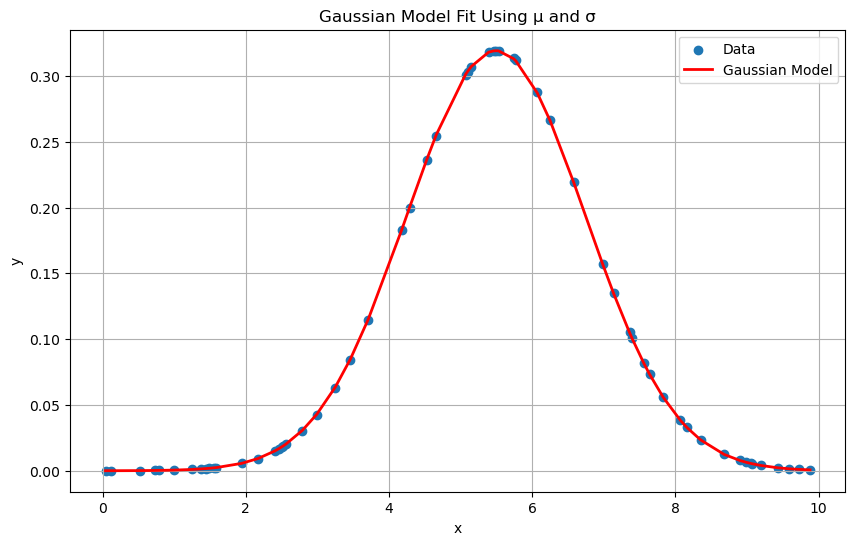

In [47]:

""" 
    - use cost_function.predict() with found paramter values and plot the dataset and model output
"""

best_params = np.array([best_mu, best_sigma])

# extract the values into lists
x_vals = gaussian_df['x'].values
y_vals = gaussian_df['y'].values

# sort out the x values
sorted_idx = np.argsort(x_vals)
x_sorted = x_vals[sorted_idx]

# perform model predictions using sorted x values
x_sorted_features = x_sorted.reshape(-1, 1)
output = gaussian_cost_func.predict(x_sorted_features, best_params)

# plotting code
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, label="Data")
plt.plot(x_sorted, output, color='red', label="Gaussian Model", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gaussian Model Fit Using μ and σ")
plt.legend()
plt.grid(True)
plt.show()
